# Campaign Finance Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Files

In [2]:
candidates = pd.read_csv('../data/all_CONUS_candidates.csv')

In [3]:
sen_2016 = pd.read_csv('../data/individual_contributions/senate/sen_2016_individ_donations.csv')
sen_2014 = pd.read_csv('../data/individual_contributions/senate/sen_2014_individ_donations.csv')
sen_2012 = pd.read_csv('../data/individual_contributions/senate/sen_2012_individ_donations.csv')
sen_2010 = pd.read_csv('../data/individual_contributions/senate/sen_2010_individ_donations.csv')
sen_2008 = pd.read_csv('../data/individual_contributions/senate/sen_2008_individ_donations.csv')
sen_2006 = pd.read_csv('../data/individual_contributions/senate/sen_2006_individ_donations.csv')
sen_2004 = pd.read_csv('../data/individual_contributions/senate/sen_2004_individ_donations.csv')
sen_2002 = pd.read_csv('../data/individual_contributions/senate/sen_2002_individ_donations.csv')
sen_2000 = pd.read_csv('../data/individual_contributions/senate/sen_2000_individ_donations.csv')
sen_1998 = pd.read_csv('../data/individual_contributions/senate/sen_1998_individ_donations.csv')
sen_1996 = pd.read_csv('../data/individual_contributions/senate/sen_1996_individ_donations.csv')
sen_1994 = pd.read_csv('../data/individual_contributions/senate/sen_1994_individ_donations.csv')
sen_1992 = pd.read_csv('../data/individual_contributions/senate/sen_1992_individ_donations.csv')
sen_1990 = pd.read_csv('../data/individual_contributions/senate/sen_1990_individ_donations.csv')

In [4]:
congr_2016 = pd.read_csv('../data/individual_contributions/house/congr_2016_individ_donations.csv')
congr_2014 = pd.read_csv('../data/individual_contributions/house/congr_2014_individ_donations.csv')
congr_2012 = pd.read_csv('../data/individual_contributions/house/congr_2012_individ_donations.csv')
congr_2010 = pd.read_csv('../data/individual_contributions/house/congr_2010_individ_donations.csv')
congr_2008 = pd.read_csv('../data/individual_contributions/house/congr_2008_individ_donations.csv')
congr_2006 = pd.read_csv('../data/individual_contributions/house/congr_2006_individ_donations.csv')
congr_2004 = pd.read_csv('../data/individual_contributions/house/congr_2004_individ_donations.csv')
congr_2002 = pd.read_csv('../data/individual_contributions/house/congr_2002_individ_donations.csv')
congr_2000 = pd.read_csv('../data/individual_contributions/house/congr_2000_individ_donations.csv')
congr_1998 = pd.read_csv('../data/individual_contributions/house/congr_1998_individ_donations.csv')
congr_1996 = pd.read_csv('../data/individual_contributions/house/congr_1996_individ_donations.csv')
congr_1994 = pd.read_csv('../data/individual_contributions/house/congr_1994_individ_donations.csv')
congr_1992 = pd.read_csv('../data/individual_contributions/house/congr_1992_individ_donations.csv')
congr_1990 = pd.read_csv('../data/individual_contributions/house/congr_1990_individ_donations.csv')

In [5]:
pacs_2016 = pd.read_csv('../data/pacs/2016_pac_donations.csv')
pacs_2014 = pd.read_csv('../data/pacs/2014_pac_donations.csv')
pacs_2012 = pd.read_csv('../data/pacs/2012_pac_donations.csv')
pacs_2010 = pd.read_csv('../data/pacs/2010_pac_donations.csv')
pacs_2008 = pd.read_csv('../data/pacs/2008_pac_donations.csv')
pacs_2006 = pd.read_csv('../data/pacs/2006_pac_donations.csv')
pacs_2004 = pd.read_csv('../data/pacs/2004_pac_donations.csv')
pacs_2002 = pd.read_csv('../data/pacs/2002_pac_donations.csv')
pacs_2000 = pd.read_csv('../data/pacs/2000_pac_donations.csv')
pacs_1998 = pd.read_csv('../data/pacs/1998_pac_donations.csv')
pacs_1996 = pd.read_csv('../data/pacs/1996_pac_donations.csv')
pacs_1994 = pd.read_csv('../data/pacs/1994_pac_donations.csv')
pacs_1992 = pd.read_csv('../data/pacs/1992_pac_donations.csv')
pacs_1990 = pd.read_csv('../data/pacs/1990_pac_donations.csv')

In [6]:
sen_records = [
    sen_2016, sen_2014, sen_2012, sen_2010, sen_2008, sen_2006, sen_2004, sen_2002, sen_2000,
    sen_1998, sen_1996, sen_1994, sen_1992, sen_1990]
num_sen_records = [round(data.shape[0]/1_000_000, 2) for data in sen_records]

In [7]:
congr_records = [
    congr_2016, congr_2014, congr_2012, congr_2010, congr_2008, congr_2006, congr_2004, congr_2002, congr_2000,
    congr_1998, congr_1996, congr_1994, congr_1992, congr_1990]
num_congr_records = [round(data.shape[0]/1_000_000, 2) for data in congr_records]

In [8]:
pac_records = [
    pacs_2016, pacs_2014, pacs_2012, pacs_2010, pacs_2008, pacs_2006, pacs_2004, pacs_2002, pacs_2000,
    pacs_1998, pacs_1996, pacs_1994, pacs_1992, pacs_1990]
num_pac_records = [round(data.shape[0]/1_000_000, 2) for data in pac_records]

In [9]:
years = ['16', '14', '12', '10', '08', '06', '04', '02', '00', '98', '96', '94', '92', '90']
all_records = pd.DataFrame(num_sen_records, columns=['Senate'], index=years)
all_records['Congress'] = pd.DataFrame(num_congr_records, columns=['Congress'], index=years)
all_records['PACs'] = pd.DataFrame(num_pac_records, columns=['PACs'], index=years)
all_records

,Senate,Congress,PACs
16,0.22,0.24,0.09
14,0.46,0.79,0.30
12,1.63,1.64,0.39
10,0.61,0.96,0.32
08,1.73,1.49,0.30
06,0.51,0.77,0.27
04,0.72,0.66,0.25
02,0.41,0.57,0.24
00,0.56,0.60,0.25
98,0.31,0.42,0.23


In [10]:
all_records.sum()

Senate      8.31
Congress    9.40
PACs        3.55
dtype: float64

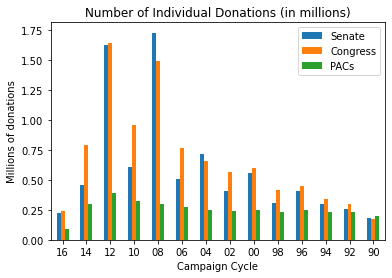

In [11]:
all_records.plot(kind='bar')
plt.xticks(rotation = 0)
plt.title("Number of Individual Donations (in millions)")
plt.ylabel("Millions of donations")
plt.xlabel("Campaign Cycle")
plt.legend();

---
# EDA - 10 year sample

In [12]:
candidates.drop(columns=['current_candidate', 'cycle_candidate'], axis=1)

,cycle,id,candidate_name,party,state,district,recip_code,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,2000,N00005009,Richmond A Soluade Sr,R,MO,1,RL,NaN,NaN,0,NaN
1,1996,N00004126,Mark Alan Behnke,R,MI,7,RN,NaN,NaN,0,0.0
2,1996,N00000718,Jim Ford,R,NJ,10,RN,NaN,NaN,0,0.0
3,1996,N00005551,Ernest J Istook,R,OK,5,RW,130384.0,99600.0,399980,169996.0
4,1996,N00008523,Stephen Wayne Hofman,R,MI,16,RL,NaN,5576.0,18050,12474.0
...,...,...,...,...,...,...,...,...,...,...,...
61329,1996,N00005453,Mark Brown,D,AR,NaN,DL,NaN,720.0,720,NaN
61330,2016,N00037568,Sean Guthrie,I,FL,NaN,3O,NaN,101.0,101,NaN
61331,2016,N00013820,Chris Van Hollen,D,MD,NaN,DO,209184.0,4032126.0,4643648,402338.0
61332,2016,N00007836,Maria Cantwell,D,WA,NaN,DI,-1750.0,122060.0,302913,182603.0


In [13]:
pac_contributions = pacs_2014.append([pacs_2012, pacs_2010, pacs_2008, pacs_2006, pacs_2004])
pac_contributions.sort_values(by='amount', ascending=False).head(8)

,cycle,date_donated,pac_id,pac_name,amount,candidate_id,industry_code,type,recip_code,direct
281022,2012,8/14/12,C00490045,Restore Our Future PAC,9856374,N00009638,J1100,24A,OI,I
281023,2012,8/21/12,C00490045,Restore Our Future PAC,9856374,N00009638,J1100,24A,OI,I
266349,2012,10/26/12,C00487363,American Crossroads,9806703,N00009638,J1100,24A,OI,I
268499,2012,10/2/12,C00487363,American Crossroads,9071481,N00009638,J1100,24A,OI,I
267759,2008,10/23/08,C00003418,Republican National Cmte,9006927,N00006424,Z5100,24C,RP,I
351045,2012,10/23/12,C00490045,Restore Our Future PAC,8830626,N00009638,J1100,24A,OI,I
372766,2012,10/23/12,C00490045,Restore Our Future PAC,8830625,N00009638,J1100,24A,OI,I
268421,2012,10/22/12,C00487363,American Crossroads,8802469,N00009638,J1100,24A,OI,I


In [14]:
sen_contributions = sen_2014.append([sen_2012, sen_2010, sen_2008, sen_2006, sen_2004])
sen_contributions.drop(columns=['transaction_id', 'contributor_id', 'ult_org'], axis=1).tail(10)

,cycle,date,recipient_id,contributor_name,org_name,amount,city,state,recip_code,type,gender,occupation,employer
716877,2004,9/30/04,N00026742,"WALLENUS, RICHARD",Wallco Industries,960.0,DIABLO,CA,RL,15,M,NaN,NaN
716878,2004,10/11/04,N00026742,"ANDERSON, ROGER",Retired,250.0,HUNTINGTON BEACH,CA,RL,15,M,NaN,NaN
716879,2004,10/11/04,N00026742,"PAIGE, RUSS B",NaN,500.0,NaN,,RL,15,M,NaN,NaN
716880,2004,10/11/04,N00026742,"SMYTHE, WILLIAM D",AutoNation,500.0,WOODSIDE,CA,RL,15,M,NaN,NaN
716881,2004,8/4/04,N00026742,"CONN, WILLIAM",Ohline Corp,2000.0,GARDENA,CA,RL,15,M,NaN,NaN
716882,2004,8/1/04,N00026742,"NELTHORPE, SUSAN",Riverside Truck & Equipment,1000.0,RIVERSIDE,CA,RL,15,F,NaN,NaN
716883,2004,8/1/04,N00026742,"OLIPHANT, RICHARD",Oliphant Enterprises,2000.0,PALM DESERT,CA,RL,15,M,NaN,NaN
716884,2004,8/1/04,N00026742,"SIMPSON, CHERYL B",Accountant,250.0,ORANGE,CA,RL,15,F,NaN,NaN
716885,2004,11/19/03,N00007017,Morongo Band of Mission Indians,Morongo Band of Mission Indians,1500.0,CABAZON,CA,RW,11,NaN,NaN,NaN
716886,2004,11/8/04,N00026247,NaN,[Candidate Contribution],525000.0,NaN,,RL,15C,NaN,NaN,NaN


In [15]:
congr_contributions = congr_2014.append([congr_2012, congr_2010, congr_2008, congr_2006, congr_2004])
congr_contributions.drop(columns=['transaction_id', 'contributor_id', 'ult_org'], axis=1).tail(10)

,cycle,date,recipient_id,contributor_name,org_name,amount,city,state,recip_code,type,gender,occupation,employer
664688,2004,10/28/04,N00024777,"WILKES, RICHARD",Bay Moorings Animal Hospital,250.0,ST PETERSBURG,FL,RW,15,M,Veterinarian,Bay Moorings Animal Hospital
664689,2004,11/2/04,N00024777,"ZWACK, HENRY",Attorney,500.0,STEPHENTOWN,NY,RW,15,M,Attorney,Self-employed
664690,2004,11/5/04,N00024777,"ZWINKLIS, SHARON",Homemaker,300.0,UNION,KY,RW,15,F,Housewife,None
664691,2004,11/19/03,N00007017,Morongo Band of Mission Indians,Morongo Band of Mission Indians,1500.0,CABAZON,CA,RW,11,NaN,NaN,NaN
664692,2004,10/28/04,N00027236,"CARBONE, NICHOLAS R",Real Estate Investor,250.0,HARTFORD,CT,DL,15,M,Real Estate Investor,Self
664693,2004,10/25/04,N00027236,"VALENGAVICH, JOHN P MR",Department of Transportation,200.0,NEW BRITAIN,CO,DL,15,M,Planner,Department of Transportation
664694,2004,11/23/04,N00027236,"SCHOENBERGER, PHILIP A",Albermarle Equites,970.0,HARTFORD,CT,DL,15,M,Real Estate Develope,Albermarle Equites
664695,2004,12/31/04,N00026331,"SMITH, MARK MR",[Candidate Contribution],1268.0,ST. LOUIS,MO,DL,15C,M,NaN,NaN
664696,2004,5/3/04,N00026460,"MCCAUL, MICHAEL",[Candidate Contribution],715000.0,AUSTIN,TX,RW,15C,M,NaN,NaN
664697,2004,4/30/04,N00018928,"MCDONALD, JOHN L",Real Estate Investor,250.0,ATLANTA,GA,RL,15,M,NaN,NaN
